In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE

In [129]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [130]:
data = pd.read_csv('/kaggle/input/dl-data/DL_DATA.csv')
data.head()

,sex,Number of family members,age,Marital Status,Education Level,Occupation,BMI (Body Mass Index) Category,Female Waist Circumference,Male Waist Circumference,feshrdarj2,Menopause,History of Heart Disease,History of Brain Consumption,History of Diabetes,History of Cancer,History of Asthma,History of Liver diseases,History of anemia,History of Anxiety,History of High Blood Pressure,History of hyperlipidemia,Q1a,Q2a,ros+,rosegradeee,WHS1,GADrotbe,Q1,Q2,FBS,diabetcas,diabeti,Ferritin,anemia,ALT,HB,AST,serumvitD,serumvitDrotb,dyslipd,metabolicsyndrome,semi-solid oil per capita,activity,Physicalactiv,waisttoheightratio,total blood pressure,prehyper,hyper1,hyper2,protein,fat,saturfat,polyfat,linoleicfat,epa,sodium,iron,magnesium,zinc,manganese,fluoride,vitaminA,vitaminE,vitaminB1,vitaminB3,folate,pantacid,vitaminc,vitamink,solublefiber,crudefiber,glucose,kilocalories,carbohydrate,cholestrol,monofat,oleicfat,linolenicfat,DHA,potassium,calcium,phosphorus,copper,selenium,chromium,betacarotene,atocopherol,riboB2,pyridoxineB6,cobalaminB12,biotin,vitaminD,dieteryfiber,insolfiber,suger,caffeine,exmilk,exveg,exfruit,exbread,exmeat,exfat,percpro,perccarb,percfat,cottage bread,oliy bread,white rice,whole grain rice,low fat meat,high fat meat,skinned chicken,skinless chicken,low fat milk,high fat milk,chocolate milk,low fat yogurt,high fat yogurt,creamy youghurt,greek yogurt,normal white cheese,creamy cheese,cottage cheese,solid animal oil,solid vegetable oil,fat tail oil,liquid canola oil,mayesaier,Iodized salt,RFAC1_1,RFAC2_1,RFAC3_1
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,90.0,0,1,83.30,2.0,21.0,13.8,20.0,20.8,2,0,2,34.412025,2,1,0,2,2,1,2,180.215316,226.612379,131.084102,16.766051,13.255908,0.021733,11363.29611,29.479437,557.667146,24.184211,4.621102,43126.45656,2270.293146,3.242412,1.486534,19.009561,567.665898,15.037097,370.730024,319.602403,0.361403,5.948473,13.397034,3648.495206,264.536383,662.256699,117.290915,84.997415,2.156206,0.018558,5507.150046,3810.575218,3325.748058,12.692445,0.211502,1.955476,485.516151,17.794342,3.916119,2.4771,10.278039,57.426357,15.298498,17.67875,2.306655,118.657104,265.950413,1.736165,4.040049,1.977427,8.462864,22.016748,29.537864,19.328571,25.982222,54.334729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282.121891,308.995025,285.848259
1,2,3,52,2,2,5,4,1,2,1,2,1,2,2,2,2,2,2,2,1,2,0,0,2,0,2,1,0,0,88.0,0,1,41.50,2.0,12.0,14.0,17.0,18.0,3,0,2,41.666667,2,1,2,1,2,2,2,172.600000,219.600000,133.100000,10.380000,7.804000,0.007000,12165.00000,11.240000,360.700000,21.800000,2.906000,23747.00000,2244.000000,2.089000,1.340000,17.810000,494.200000,13.820000,524.800000,317.300000,0.196000,3.436000,8.568000,3261.000000,157.500000,652.600000,62.960000,52.540000,1.896000,0.019000,4105.000000,3727.000000,3057.000000,1.016000,0.199000,0.021000,575.300000,6.406000,3.606000,2.2940,9.278000,38.230000,14.750000,13.02000,1.409000,46.880000,152.500000,0.400000,1.700000,1.200000,6.800000,23.700000,27.800000,21.000000,19.000000,60.000000,2,1,1,2,1,2,2,1,1,1,1,1,1,2,2,1,2,2,2,1,2,2,1,1,249.000000,23.000000,446.000000
2,2,5,42,2,2,5,4,1,1,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,1,1,4,81.0,0,1,34.60,2.0,17.0,14.3,15.0,10.3,3,1,2,34.412025,2,2,2,1,1,2,2,191.100000,244.000000,149.200000,16.110000,13.460000,0.000000,12997.00000,10.050000,397.100000,26.200000,4.416000,46793.00000,2167.000000,1.156000,1.268000,15.550000,564.900000,16.590000,126.700000,403.800000,0.140000,4.744000,5.585000,3478.000000,136.900000,779.900000,64.970000,49.350000,1.854000,0.000000,4423.000000,4654.000000,3664.000000,1.173000,0.220000,0.010000,364.500000,8.340000,4.808000,2.4910,11.900000,38.310000,14.470000,11.07000,0.981000,44.070000,288.900000,1.500000,5.000000,0.200000,4.100000,24.600000,31.600000,22.000000,16.000000,69.000000,2,1,0,0,1,2,2,1,1,2,2,1,2,2,2,1,2,2,2,1,2,2,1,1,11.000000,178.000000,48.000000
3,1,5,15,1,2,3,3,1,2,1,0,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,2,1,4,88.0,0,1,73.70,2.0,104.0,15.2,53.0,33.7,1,0,1,34.412025,2,3,2,1,2,2,2,220.7

dyslipd
0    443
1     88
Name: count, dtype: int64


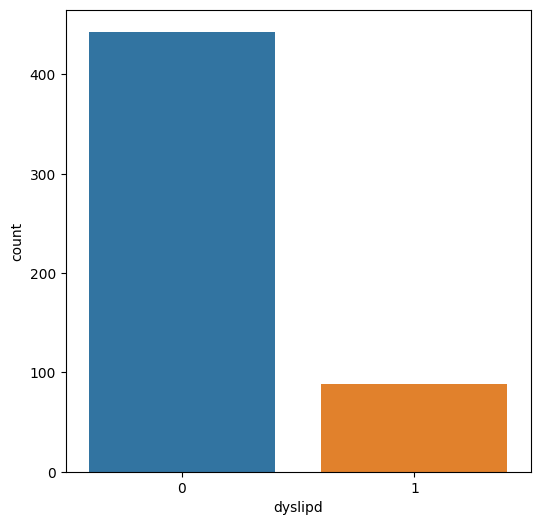

In [131]:
print(data['dyslipd'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='dyslipd',
    data=data
);

In [132]:
X = data.drop('dyslipd' , axis=1)
Y = data['dyslipd']

In [133]:
smt=SMOTE(random_state=42)
X_tr_balanced, y_tr_balanced = smt.fit_resample(X, Y)

print('Before balance :')
print(X.shape, Y.shape, np.unique(Y, return_counts=True))

print('------------------------------------')
print('Balanced with SMOTE:')
print(X_tr_balanced.shape, y_tr_balanced.shape, np.unique(y_tr_balanced, return_counts=True))

Before balance :
(531, 131) (531,) (array([0, 1]), array([443,  88]))
------------------------------------
Balanced with SMOTE:
(886, 131) (886,) (array([0, 1]), array([443, 443]))


In [134]:
X_train, X_val, Y_train, Y_val = train_test_split(X_tr_balanced, y_tr_balanced, test_size=0.2, random_state=42)

In [135]:
print('Train Data :')

print(X_train.shape, Y_train.shape, np.unique(Y_train, return_counts=True))


print('\nValidation Data :')

print(X_val.shape, Y_val.shape, np.unique(Y_val, return_counts=True))

Train Data :
(708, 131) (708,) (array([0, 1]), array([343, 365]))

Validation Data :
(178, 131) (178,) (array([0, 1]), array([100,  78]))


In [136]:
data.head(1)

,sex,Number of family members,age,Marital Status,Education Level,Occupation,BMI (Body Mass Index) Category,Female Waist Circumference,Male Waist Circumference,feshrdarj2,Menopause,History of Heart Disease,History of Brain Consumption,History of Diabetes,History of Cancer,History of Asthma,History of Liver diseases,History of anemia,History of Anxiety,History of High Blood Pressure,History of hyperlipidemia,Q1a,Q2a,ros+,rosegradeee,WHS1,GADrotbe,Q1,Q2,FBS,diabetcas,diabeti,Ferritin,anemia,ALT,HB,AST,serumvitD,serumvitDrotb,dyslipd,metabolicsyndrome,semi-solid oil per capita,activity,Physicalactiv,waisttoheightratio,total blood pressure,prehyper,hyper1,hyper2,protein,fat,saturfat,polyfat,linoleicfat,epa,sodium,iron,magnesium,zinc,manganese,fluoride,vitaminA,vitaminE,vitaminB1,vitaminB3,folate,pantacid,vitaminc,vitamink,solublefiber,crudefiber,glucose,kilocalories,carbohydrate,cholestrol,monofat,oleicfat,linolenicfat,DHA,potassium,calcium,phosphorus,copper,selenium,chromium,betacarotene,atocopherol,riboB2,pyridoxineB6,cobalaminB12,biotin,vitaminD,dieteryfiber,insolfiber,suger,caffeine,exmilk,exveg,exfruit,exbread,exmeat,exfat,percpro,perccarb,percfat,cottage bread,oliy bread,white rice,whole grain rice,low fat meat,high fat meat,skinned chicken,skinless chicken,low fat milk,high fat milk,chocolate milk,low fat yogurt,high fat yogurt,creamy youghurt,greek yogurt,normal white cheese,creamy cheese,cottage cheese,solid animal oil,solid vegetable oil,fat tail oil,liquid canola oil,mayesaier,Iodized salt,RFAC1_1,RFAC2_1,RFAC3_1
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,90.0,0,1,83.3,2.0,21.0,13.8,20.0,20.8,2,0,2,34.412025,2,1,0,2,2,1,2,180.215316,226.612379,131.084102,16.766051,13.255908,0.021733,11363.29611,29.479437,557.667146,24.184211,4.621102,43126.45656,2270.293146,3.242412,1.486534,19.009561,567.665898,15.037097,370.730024,319.602403,0.361403,5.948473,13.397034,3648.495206,264.536383,662.256699,117.290915,84.997415,2.156206,0.018558,5507.150046,3810.575218,3325.748058,12.692445,0.211502,1.955476,485.516151,17.794342,3.916119,2.4771,10.278039,57.426357,15.298498,17.67875,2.306655,118.657104,265.950413,1.736165,4.040049,1.977427,8.462864,22.016748,29.537864,19.328571,25.982222,54.334729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282.121891,308.995025,285.848259


## Correlation matrix

### 100%

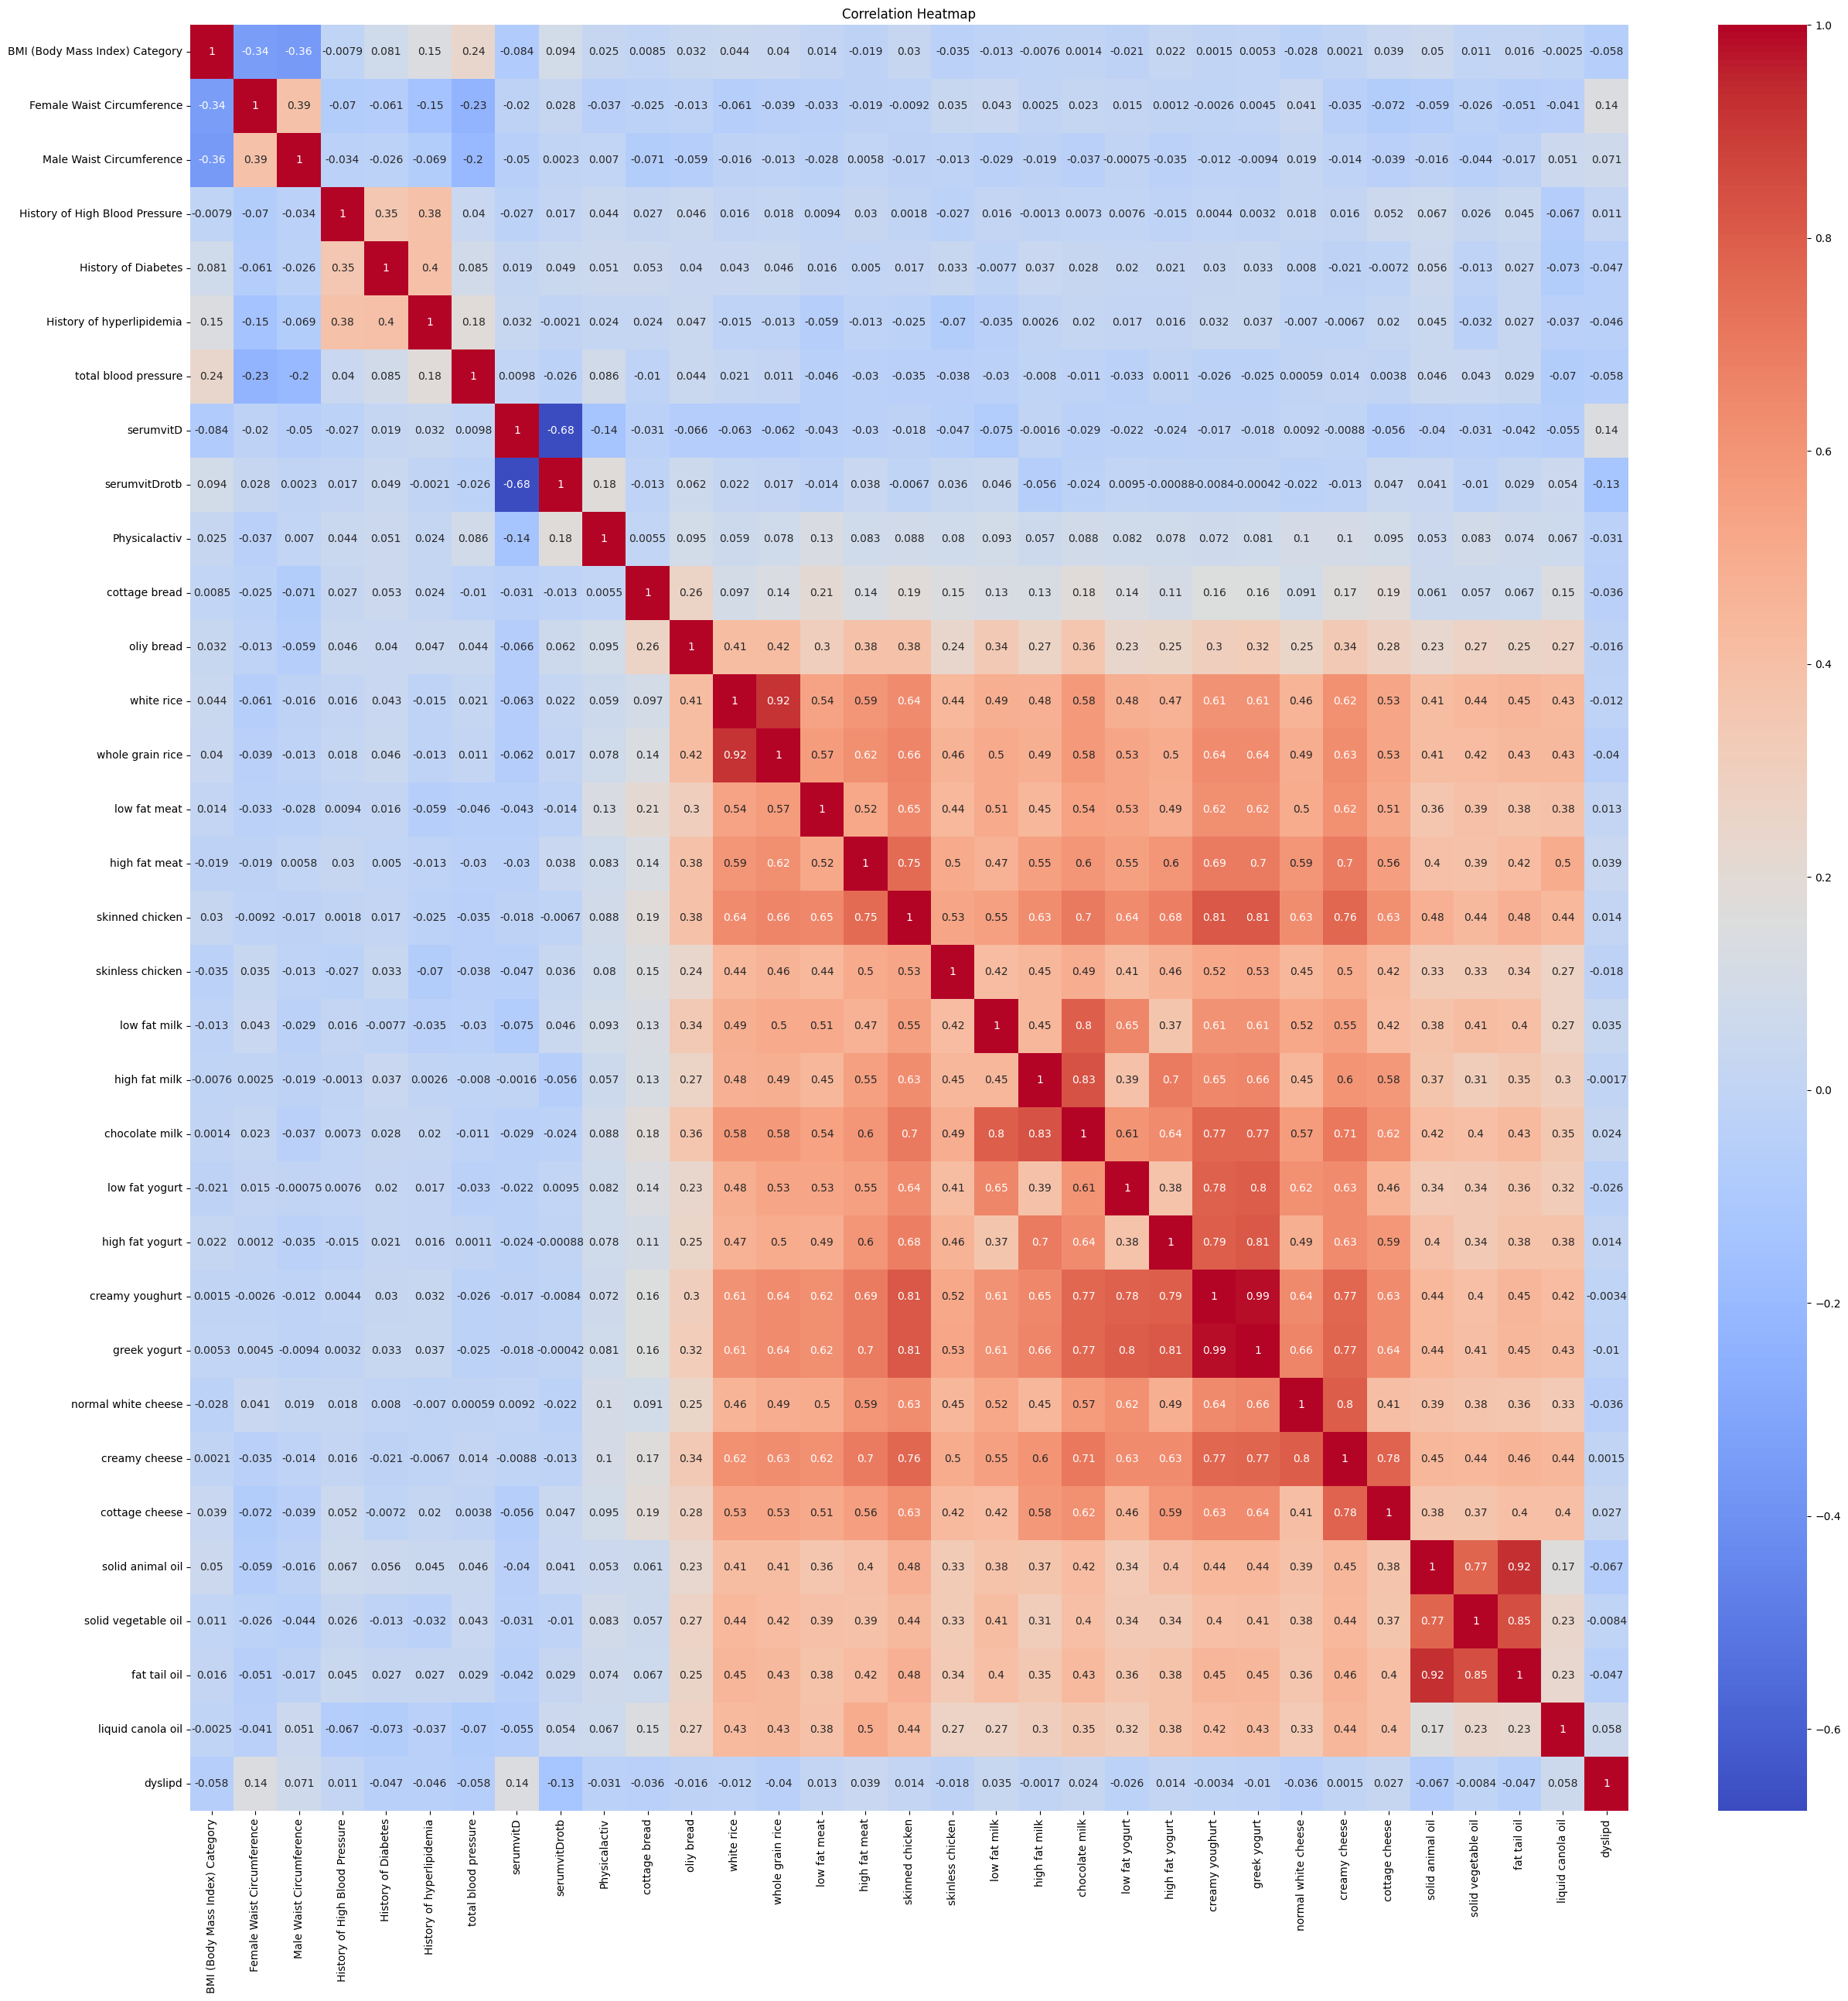

In [21]:
corr_m_100 = data[['BMI (Body Mass Index) Category', 'Female Waist Circumference', 'Male Waist Circumference',
                           'History of High Blood Pressure', 'History of Diabetes', 'History of hyperlipidemia',
                           'total blood pressure', 'serumvitD' , 'serumvitDrotb', 'Physicalactiv','cottage bread', 'oliy bread',
                           'white rice', 'whole grain rice', 'low fat meat', 'high fat meat', 'skinned chicken',
                           'skinless chicken', 'low fat milk', 'high fat milk', 'chocolate milk', 'low fat yogurt',
                           'high fat yogurt', 'creamy youghurt', 'greek yogurt', 'normal white cheese', 'creamy cheese',
                           'cottage cheese', 'solid animal oil', 'solid vegetable oil', 'fat tail oil', 'liquid canola oil',
                           'dyslipd']].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_m_100, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
p100_correlation = corr_m_100['dyslipd'].sort_values(ascending=False)

print(p100_correlation)

dyslipd                           1.000000
serumvitD                         0.143264
Female Waist Circumference        0.142766
Male Waist Circumference          0.070867
liquid canola oil                 0.057934
high fat meat                     0.039265
low fat milk                      0.035433
cottage cheese                    0.026959
chocolate milk                    0.024124
skinned chicken                   0.014128
high fat yogurt                   0.013928
low fat meat                      0.012501
History of High Blood Pressure    0.011078
creamy cheese                     0.001529
high fat milk                    -0.001655
creamy youghurt                  -0.003449
solid vegetable oil              -0.008390
greek yogurt                     -0.010492
white rice                       -0.011953
oliy bread                       -0.015679
skinless chicken                 -0.017753
low fat yogurt                   -0.026129
Physicalactiv                    -0.031437
cottage bre

### more than 50%

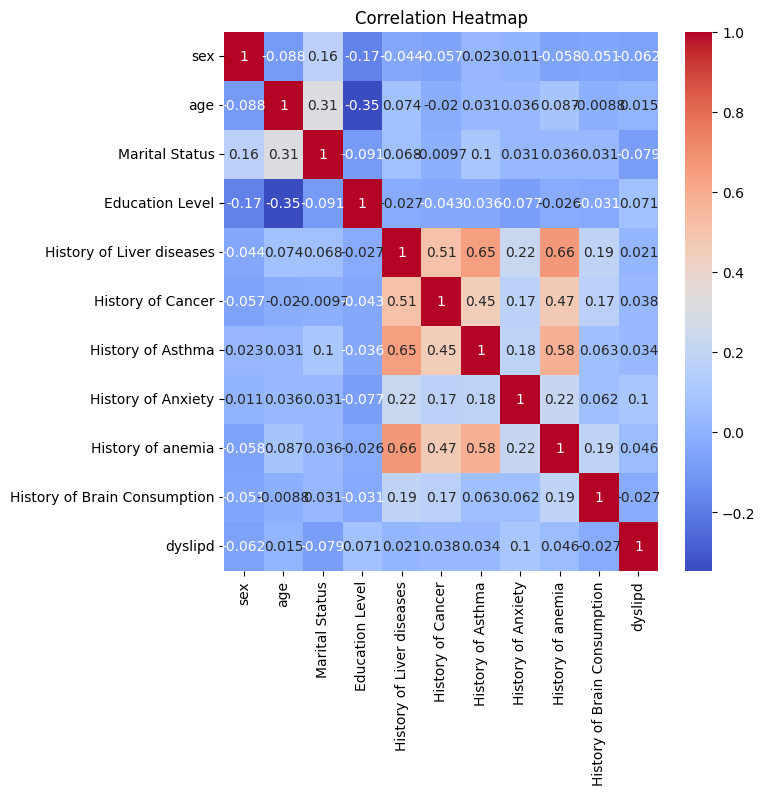

In [79]:
corr_m_50= data[['sex','age','Marital Status' , 'Education Level','History of Liver diseases' , 'History of Cancer' ,'History of Asthma'
                 , 'History of Anxiety' , 'History of anemia','History of Brain Consumption' , 'dyslipd']].corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_m_50, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [80]:
p50_correlation = corr_m_50['dyslipd'].sort_values(ascending=False)

print(p50_correlation)

dyslipd                         1.000000
History of Anxiety              0.101288
Education Level                 0.071209
History of anemia               0.046181
History of Cancer               0.037921
History of Asthma               0.034364
History of Liver diseases       0.020630
age                             0.015110
History of Brain Consumption   -0.026513
sex                            -0.061726
Marital Status                 -0.078803
Name: dyslipd, dtype: float64


hyperlipidemia 	Q1a 	Q2a 	ros+ 	rosegradeee 	WHS1 	GADrotbe 	Q1 	Q2 	FBS 	diabetcas 	diabeti 	Ferritin

### more than 30%

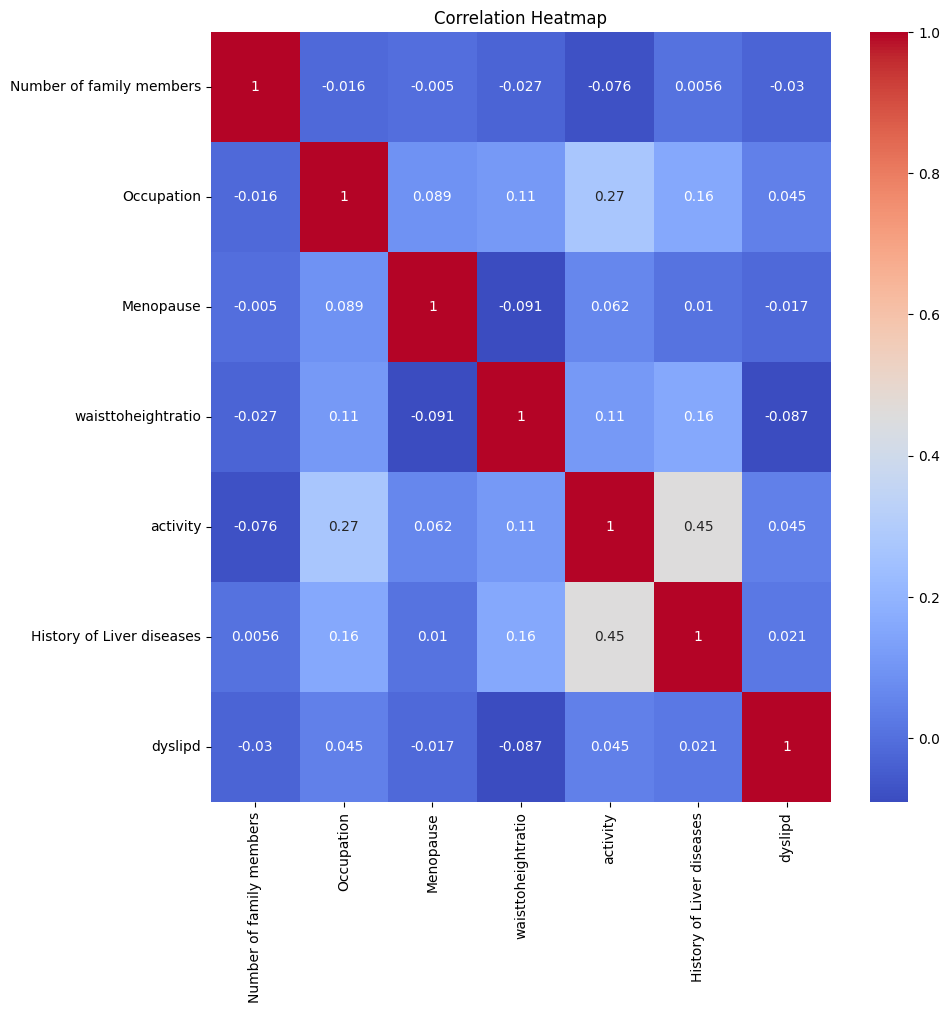

In [25]:
corr_m_30= data[['Number of family members'  ,'Occupation' , 'Menopause' , 'waisttoheightratio', 'activity' ,'History of Liver diseases' ,  'dyslipd']].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_m_30, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
p_m30_correlation = corr_m_30['dyslipd'].sort_values(ascending=False)

print(p_m30_correlation)

dyslipd                      1.000000
Occupation                   0.045450
activity                     0.044808
History of Liver diseases    0.020630
Menopause                   -0.017086
Number of family members    -0.029597
waisttoheightratio          -0.086532
Name: dyslipd, dtype: float64


In [137]:
data.head(1)

,sex,Number of family members,age,Marital Status,Education Level,Occupation,BMI (Body Mass Index) Category,Female Waist Circumference,Male Waist Circumference,feshrdarj2,Menopause,History of Heart Disease,History of Brain Consumption,History of Diabetes,History of Cancer,History of Asthma,History of Liver diseases,History of anemia,History of Anxiety,History of High Blood Pressure,History of hyperlipidemia,Q1a,Q2a,ros+,rosegradeee,WHS1,GADrotbe,Q1,Q2,FBS,diabetcas,diabeti,Ferritin,anemia,ALT,HB,AST,serumvitD,serumvitDrotb,dyslipd,metabolicsyndrome,semi-solid oil per capita,activity,Physicalactiv,waisttoheightratio,total blood pressure,prehyper,hyper1,hyper2,protein,fat,saturfat,polyfat,linoleicfat,epa,sodium,iron,magnesium,zinc,manganese,fluoride,vitaminA,vitaminE,vitaminB1,vitaminB3,folate,pantacid,vitaminc,vitamink,solublefiber,crudefiber,glucose,kilocalories,carbohydrate,cholestrol,monofat,oleicfat,linolenicfat,DHA,potassium,calcium,phosphorus,copper,selenium,chromium,betacarotene,atocopherol,riboB2,pyridoxineB6,cobalaminB12,biotin,vitaminD,dieteryfiber,insolfiber,suger,caffeine,exmilk,exveg,exfruit,exbread,exmeat,exfat,percpro,perccarb,percfat,cottage bread,oliy bread,white rice,whole grain rice,low fat meat,high fat meat,skinned chicken,skinless chicken,low fat milk,high fat milk,chocolate milk,low fat yogurt,high fat yogurt,creamy youghurt,greek yogurt,normal white cheese,creamy cheese,cottage cheese,solid animal oil,solid vegetable oil,fat tail oil,liquid canola oil,mayesaier,Iodized salt,RFAC1_1,RFAC2_1,RFAC3_1
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,90.0,0,1,83.3,2.0,21.0,13.8,20.0,20.8,2,0,2,34.412025,2,1,0,2,2,1,2,180.215316,226.612379,131.084102,16.766051,13.255908,0.021733,11363.29611,29.479437,557.667146,24.184211,4.621102,43126.45656,2270.293146,3.242412,1.486534,19.009561,567.665898,15.037097,370.730024,319.602403,0.361403,5.948473,13.397034,3648.495206,264.536383,662.256699,117.290915,84.997415,2.156206,0.018558,5507.150046,3810.575218,3325.748058,12.692445,0.211502,1.955476,485.516151,17.794342,3.916119,2.4771,10.278039,57.426357,15.298498,17.67875,2.306655,118.657104,265.950413,1.736165,4.040049,1.977427,8.462864,22.016748,29.537864,19.328571,25.982222,54.334729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282.121891,308.995025,285.848259


## Feature Selection

In [138]:
selected_features = ['BMI (Body Mass Index) Category','sex','age','Marital Status','Education Level','Number of family members', 'Female Waist Circumference',
                     'Male Waist Circumference', 'History of High Blood Pressure',
                     'History of Diabetes','cobalaminB12', 'History of hyperlipidemia','prehyper','hyper1', 'Physicalactiv','skinless chicken','normal white cheese']

X_train_selected = X_train[selected_features]

X_val_selected = X_val[selected_features]



print('After feature selection')
print('Train Data :')
print(X_train_selected.shape, Y_train.shape, np.unique(Y_train, return_counts=True))

print('\nValidation Data :')
print(X_val_selected.shape, Y_val.shape, np.unique(Y_val, return_counts=True))

After feature selection
Train Data :
(708, 17) (708,) (array([0, 1]), array([343, 365]))

Validation Data :
(178, 17) (178,) (array([0, 1]), array([100,  78]))


In [139]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_selected)
X_train_scaled = ss.transform(X_train_selected)

X_val_scaled = ss.transform(X_val_selected)

In [140]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L1 , L2
from tensorflow.keras.layers import Dropout, Dense, Input, Flatten, BatchNormalization , Conv1D, Flatten, MaxPooling1D , GlobalMaxPooling1D
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import GlorotNormal, HeNormal
from sklearn.metrics import accuracy_score , f1_score,precision_score, recall_score
from keras.callbacks import EarlyStopping

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ELU

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.metrics import Accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [141]:
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val_scaled, dtype=tf.float32)
Y_val_tensor = tf.convert_to_tensor(Y_val, dtype=tf.float32)

### Model 1 - sequential

In [142]:
model_1 = Sequential()

model_1.add(Dense(1024, input_shape=(17,), name='Dense_1' ,activation='relu'))
model_1.add(Dropout(0.1, name='Dropout_1'))
model_1.add(BatchNormalization())

model_1.add(Dense(512, activation='relu',name = 'Dense_2', kernel_initializer=GlorotNormal()))
model_1.add(Dropout(0.1, name='Dropout_2'))

model_1.add(Dense(512, activation='relu',name = 'Dense_3', kernel_initializer=GlorotNormal()))
model_1.add(Dropout(0.1, name='Dropout_3'))
model_1.add(BatchNormalization())

model_1.add(Dense(1, activation='sigmoid',name = 'Output', kernel_initializer=GlorotNormal(), kernel_regularizer=L2(0.01)))


model_1.compile(loss='binary_crossentropy', optimizer='ADAM', metrics=['accuracy'])

model_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 1024)           │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,545 (3.10 MB)

 Trainable params: 809,473 (3.09 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [167]:
history_1 = model_1.fit(X_train_tensor, Y_train_tensor, epochs=1000, batch_size=32 , shuffle = True
                        ,callbacks=[EarlyStopping(monitor='val_loss',patience=100)], validation_split=0.2)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.8380 - val_loss: 0.8307
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8380 - val_loss: 0.8105
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8451 - val_loss: 0.7954
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.8239 - val_loss: 0.7949
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8310 - val_loss: 0.7861
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.8310 - val_loss: 0.7815
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.8380 - val_loss: 0.7721
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accu

In [168]:
loss_t1, accuracy_t1 = model_1.evaluate(X_train_tensor , Y_train_tensor)
print(f"Train Loss: {loss_t1:.4f}, Train Accuracy: {accuracy_t1:.4f}")

loss_v1, accuracy_v1 = model_1.evaluate(X_val_tensor , Y_val_tensor)
print(f"Validation Loss: {loss_v1:.4f}, Validation Accuracy: {accuracy_v1:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0356
Train Loss: 0.1716, Train Accuracy: 0.9732
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9034 - loss: 0.5511 
Validation Loss: 0.4913, Validation Accuracy: 0.8989


In [169]:
train_predictions1 = (model_1.predict(X_train_tensor) > 0.5).astype(int)

val_predictions1 = (model_1.predict(X_val_tensor) > 0.5).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [170]:
print("Training Data Classification Report")
print(classification_report(Y_train_tensor, train_predictions1))

print("\nValidation Data Classification Report")
print(classification_report(Y_val_tensor, val_predictions1))

Training Data Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       343
         1.0       0.97      0.98      0.97       365

    accuracy                           0.97       708
   macro avg       0.97      0.97      0.97       708
weighted avg       0.97      0.97      0.97       708


Validation Data Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       100
         1.0       0.89      0.87      0.88        78

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



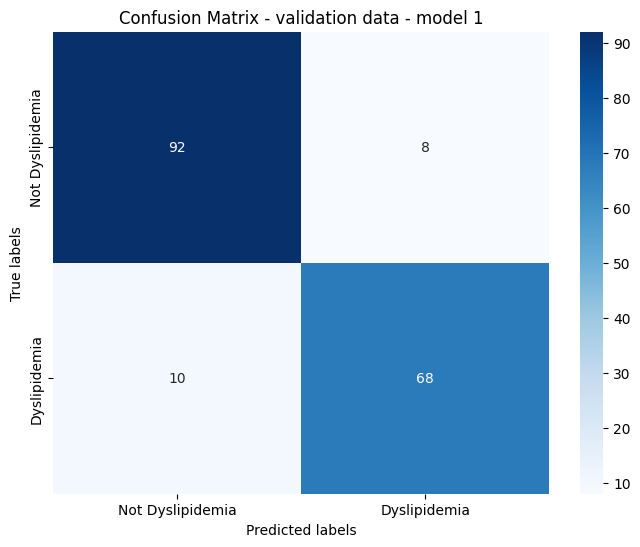

In [171]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val_tensor, val_predictions1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Dyslipidemia', 'Dyslipidemia'], yticklabels=['Not Dyslipidemia', 'Dyslipidemia'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - validation data - model 1')
plt.show()


### Model 2 - functional

In [32]:
input_layer = Input(shape=(17,))


dense_1 = Dense(256, activation='relu', name='Dense_1')(input_layer)
dropout_1 = Dropout(0.2, name='Dropout_1')(dense_1)
btcn_1 =BatchNormalization()

dense_2 = Dense(256, activation='relu', name='Dense_2')(dropout_1)
dropout_2 = Dropout(0.2, name='Dropout_2')(dense_2)
btcn_2 =BatchNormalization()

dense_3 = Dense(256, activation='relu', name='Dense_3')(dropout_2)
dropout_3 = Dropout(0.1, name='Dropout_3')(dense_3)



concatenated = concatenate([dropout_3 , input_layer], name='Concatenate')

output_layer = Dense(1, activation='sigmoid', name='Output', kernel_initializer=GlorotNormal(), kernel_regularizer=L2(0.02))(concatenated)

model_2 = Model(inputs=input_layer, outputs=output_layer)

model_2.compile(loss='binary_crossentropy', optimizer='ADAM', metrics=['accuracy'])

model_2.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_1 (Dense)     │ (None, 256)       │      4,608 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout_1 (Dropout) │ (None, 256)       │          0 │ Dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_2 (Dense)     │ (None, 256)       │     65,792 │ Dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout_2 (Dropout) │ (None, 256)       │          0 │ Dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_3 (Dense)     │ (None, 256)       │     65,792 │ Dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout_3 (Dropout) │ (None, 256)       │          0 │ Dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concatenate         │ (None, 273)       │          0 │ Dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │        274 │ Concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 136,466 (533.07 KB)

 Trainable params: 136,466 (533.07 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history_2 = model_2.fit(X_train_tensor, Y_train_tensor, epochs=500, batch_size=16,shuffle=True
                        ,callbacks=[EarlyStopping(monitor='val_loss',patience=100)], validation_split=0.3)

Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8310 - val_loss: 1.3010
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8169 - val_loss: 1.3026
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8310 - val_loss: 1.2309
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8263 - val_loss: 1.1876
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.8404 - val_loss: 1.3617
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8404 - val_loss: 1.3443
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9970 - loss: 0.0077 - val_accuracy: 0.8498 - val_loss: 1.3544
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9967 - loss: 0.0152 - val_accuracy: 0.8216 - v

In [49]:
loss_t2, accurac_t2 = model_2.evaluate(X_train_tensor , Y_train_tensor)
print(f"Train Loss: {loss_t2:.4f}, Train Accuracy: {accurac_t2:.4f}")

loss_v2, accuracy_v2 = model_2.evaluate(X_val_tensor , Y_val_tensor)
print(f"Validation Loss: {loss_v2:.4f}, Validation Accuracy: {accuracy_v2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.1258 
Train Loss: 0.5011, Train Accuracy: 0.9520
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 2.4922 
Validation Loss: 2.1183, Validation Accuracy: 0.8371


In [50]:
train_predictions2 = (model_2.predict(X_train_tensor) > 0.5).astype(int)

val_predictions2 = (model_2.predict(X_val_tensor) > 0.5).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [51]:
print("Training Data Classification Report")
print(classification_report(Y_train_tensor, train_predictions2))

print("\nValidation Data Classification Report")
print(classification_report(Y_val_tensor, val_predictions2))

Training Data Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       343
         1.0       0.94      0.96      0.95       365

    accuracy                           0.95       708
   macro avg       0.95      0.95      0.95       708
weighted avg       0.95      0.95      0.95       708


Validation Data Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       100
         1.0       0.78      0.88      0.83        78

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178



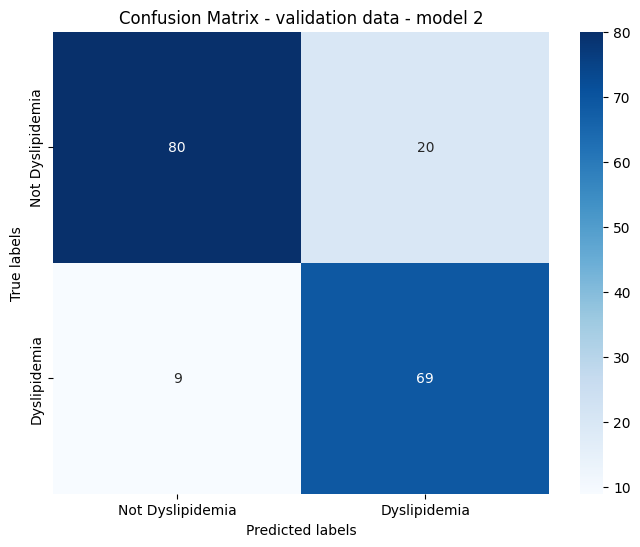

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val_tensor, val_predictions2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Dyslipidemia', 'Dyslipidemia'], yticklabels=['Not Dyslipidemia', 'Dyslipidemia'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - validation data - model 2')
plt.show()


### Model 3 - +CONVONUTIONAL

In [53]:
input_layer = Input(shape=(X_train_scaled.shape[1], 1))


conv_1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_normal')(input_layer)
conv_1 = MaxPooling1D(pool_size=2)(conv_1)
conv_1 = Dropout(0.1)(conv_1)

conv_2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv_1)
conv_2 = MaxPooling1D(pool_size=2)(conv_2)
conv_2 = Dropout(0.1)(conv_2)

conv_3 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv_2)
conv_3 = MaxPooling1D(pool_size=2)(conv_3)
conv_3 = Dropout(0.1)(conv_3)

conv_4 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_normal')(conv_3)
conv_4 = GlobalMaxPooling1D()(conv_4)
conv_4 = Dropout(0.1)(conv_4)


flattened = Flatten()(conv_4)


#dense_1 = Dense(64, activation='relu', kernel_initializer='he_normal')(flattened)
#dense_1 = Dropout(0.1)(dense_1)
#dense_1 = BatchNormalization()(dense_1)

#dense_2 = Dense(512, activation='relu', kernel_initializer='he_normal')(flattened)
#dense_2 = Dropout(0.1)(dense_2)
#dense_2 = BatchNormalization()(flattened)


output_layer = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(flattened)


model_cnn = Model(inputs=input_layer, outputs=output_layer)


model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 17, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 2, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,641 (1.22 MB)

 Trainable params: 320,641 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history_cnn = model_cnn.fit(X_train_tensor, Y_train_tensor, epochs=500, batch_size=16, validation_data=(X_val_tensor, Y_val_tensor) , 
                           shuffle=True , callbacks=[EarlyStopping(monitor='val_loss',patience=100)], validation_split=0.2)

Epoch 1/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 1.2763e-04 - val_accuracy: 0.7978 - val_loss: 2.7021
Epoch 2/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 7.9950e-04 - val_accuracy: 0.7978 - val_loss: 2.4755
Epoch 3/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9989 - loss: 0.0018 - val_accuracy: 0.8258 - val_loss: 2.3889
Epoch 4/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 1.4381e-04 - val_accuracy: 0.8202 - val_loss: 2.4057
Epoch 5/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 1.4877e-04 - val_accuracy: 0.8202 - val_loss: 2.4693
Epoch 6/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9981 - loss: 0.0033 - val_accuracy: 0.7809 - val_loss: 3.1123
Epoch 7/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9969 - loss: 0.0057 - val_accuracy: 0.8090 - val_loss: 2.9507
Epoch 8/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 2.0030e-04 

In [75]:
train_predictions_cnn = (model_cnn.predict(X_train_tensor) > 0.5).astype(int)

val_predictions_cnn = (model_cnn.predict(X_val_tensor) > 0.5).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [76]:
loss_t_cnn, accurac_t_cnn = model_cnn.evaluate(X_train_tensor , Y_train_tensor)
print(f"Train Loss: {loss_t_cnn:.4f}, Train Accuracy: {accurac_t_cnn:.4f}")

loss_v_cnn, accuracy_v_cnn = model_cnn.evaluate(X_val_tensor , Y_val_tensor)
print(f"Validation Loss: {loss_v_cnn:.4f}, Validation Accuracy: {accuracy_v_cnn:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.3694e-06
Train Loss: 0.0000, Train Accuracy: 1.0000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8022 - loss: 2.6649 
Validation Loss: 2.5135, Validation Accuracy: 0.8090


In [77]:
print("Training Data Classification Report")
print(classification_report(Y_train_tensor, train_predictions_cnn))

print("\nValidation Data Classification Report")
print(classification_report(Y_val_tensor, val_predictions_cnn))

Training Data Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       365

    accuracy                           1.00       708
   macro avg       1.00      1.00      1.00       708
weighted avg       1.00      1.00      1.00       708


Validation Data Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       100
         1.0       0.75      0.85      0.80        78

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.81       178



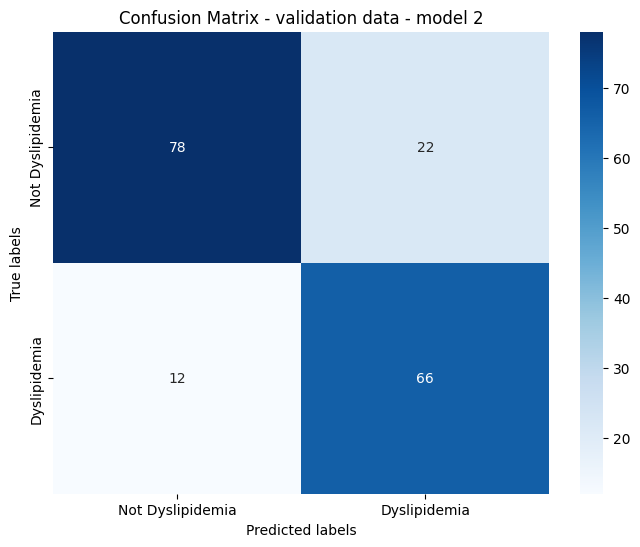

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val_tensor, val_predictions_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Dyslipidemia', 'Dyslipidemia'], yticklabels=['Not Dyslipidemia', 'Dyslipidemia'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - validation data - model 2')
plt.show()
